In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
sales_data = pd.read_csv("F:/python/Retail-Analysis-with-Walmart-Data-Project-main/Walmart_Store_sales.csv")
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [67]:
sales_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [68]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [69]:
#changing the data type of date column because it is a objective type
from datetime import datetime
sales_data['Date']=pd.to_datetime(sales_data['Date'])

D:\Program Files\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Program Files\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Program Files\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Program Files\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or sp

In [70]:
sales_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

## Statistical tasks

In [71]:
#Which Store has maximum sales
Total_sales = sales_data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)
Total_sales

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

In [72]:
pd.DataFrame(Total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


Store 20 has maximum Sales

In [73]:
#Which store has maximum standard deviation the sales vary a lot
#Aslo fing the coefficient of mean to standard deviation

In [74]:
sales_data_std = sales_data.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=False)
sales_data_std

Store
14    317570.0
10    302262.0
20    275901.0
4     266201.0
13    265507.0
23    249788.0
27    239930.0
2     237684.0
39    217466.0
6     212526.0
35    211243.0
19    191723.0
41    187907.0
28    181759.0
18    176642.0
24    167746.0
11    165834.0
22    161251.0
1     155981.0
12    139167.0
32    138017.0
45    130169.0
21    128753.0
31    125856.0
15    120539.0
40    119002.0
25    112977.0
7     112585.0
17    112163.0
26    110431.0
8     106281.0
34    104630.0
29     99120.0
16     85770.0
9      69029.0
36     60725.0
42     50263.0
3      46320.0
38     42768.0
43     40598.0
5      37738.0
44     24763.0
33     24133.0
30     22810.0
37     21837.0
Name: Weekly_Sales, dtype: float64

In [75]:
pd.DataFrame(sales_data_std).head(1)

,Weekly_Sales
Store,
14,317570.0


Store 14 has maximum standard deviation

In [76]:
#coefficient of mean to standard deviation

In [77]:
store14 = sales_data[sales_data.Store==14].Weekly_Sales

In [78]:
store14

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [79]:
mean_std_dev = store14.std()/store14.mean()*100

In [80]:
print(mean_std_dev,'%')

15.713673600948338 %


In [81]:
#which store has good quaterly growth rate in Q3'2012?
q2_sales = sales_data[(sales_data['Date']>'2012-04-01') & (sales_data['Date']>'2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [82]:
#q2_sales

In [83]:
q3_sales = sales_data[(sales_data['Date']>'2012-07-01') & (sales_data['Date']>'2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [84]:
#q3_sales

In [85]:
#growth rate = ((present-past)/past)*100
#Growth rate = ((present-past)/past)*100
sales_data_2012=pd.DataFrame({'Q2 Sales':q2_sales,'Q3 Sales':q3_sales,'Difference':(q3_sales-q2_sales),'Growth Rate %':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by='Growth Rate %',ascending=False).head()
sales_data_2012

,Q2 Sales,Q3 Sales,Difference,Growth Rate %
Store,,,,
14,30788006.0,10647575.0,-20140431.0,-65.416484
33,4853145.0,1676073.0,-3177072.0,-65.464189
20,37635224.0,12969286.0,-24665938.0,-65.539501
10,32253807.0,11084451.0,-21169356.0,-65.633666
42,10394526.0,3563686.0,-6830840.0,-65.715743


In [86]:
max_sales_2012Q3=sales_data_2012.groupby('Store')['Growth Rate %'].sum()
max_sales_2012Q3.idxmax()

14

No store shown quaterly growth rate in Q3'2012, although store 14 has maximum growth rate as compared to others

In [87]:
#some Holidays have a negitive impact on sales. Find out holiday that have higher.
#sales that the mean sales in the nono-holiday season for all store together.

In [88]:
#Calculating the holiday event sales of each of the events and then find the non-holiday sales.

In [89]:
#Holiday events
Super_Bowl=['12-02-2010','11-02-2011','10-02-2012','08-02-2013']
Labour_Day=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
Thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29'] 
Christmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [90]:
Super_Bowl_sales = round(sales_data[sales_data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales = round(sales_data[sales_data.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales = round(sales_data[sales_data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales = round(sales_data[sales_data.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [91]:
Super_Bowl_sales,Labour_Day_sales,Thanksgiving_sales,Christmas_sales

(1079127.99, 1039182.83, 1471273.43, 960833.11)

In [92]:
##Non-holiday Sales and Comparison

In [93]:
non_holiday_sales = round(sales_data[sales_data['Holiday_Flag']==0]['Weekly_Sales'].mean(),2)
non_holiday_sales

1041256.38

In [94]:
 pd.DataFrame([{'Super Bowl sales':Super_Bowl_sales,'Labour day sales':Labour_Day_sales,'Thanksgiving Sales':Thanksgiving_sales,'Christmas Sales':Christmas_sales,'non holiday Sales':non_holiday_sales}]).T

,0
Super Bowl sales,1079127.99
Labour day sales,1039182.83
Thanksgiving Sales,1471273.43
Christmas Sales,960833.11
non holiday Sales,1041256.38


Thanksgiving has the highest sales (1,471,273.43) than non-holiday sales (1,041,256.38)

In [95]:
#Provide a monthly and semester view of sales in units and give insights.

Plotting a month-wise bar graph for weekly sales to get an idea about which month has the maximum sales, then will plot the semester-wise bar graph for weekly sales to get some insights about the semester's weekly sales.

In [96]:
sales_data['year'] = pd.DatetimeIndex(sales_data['Date']).year 
sales_data['month'] = pd.DatetimeIndex(sales_data['Date']).month 
sales_data['day'] = pd.DatetimeIndex(sales_data['Date']).day 

In [97]:
#Monthwise Sales

Text(0.5, 1.0, 'Monthwise Sales')

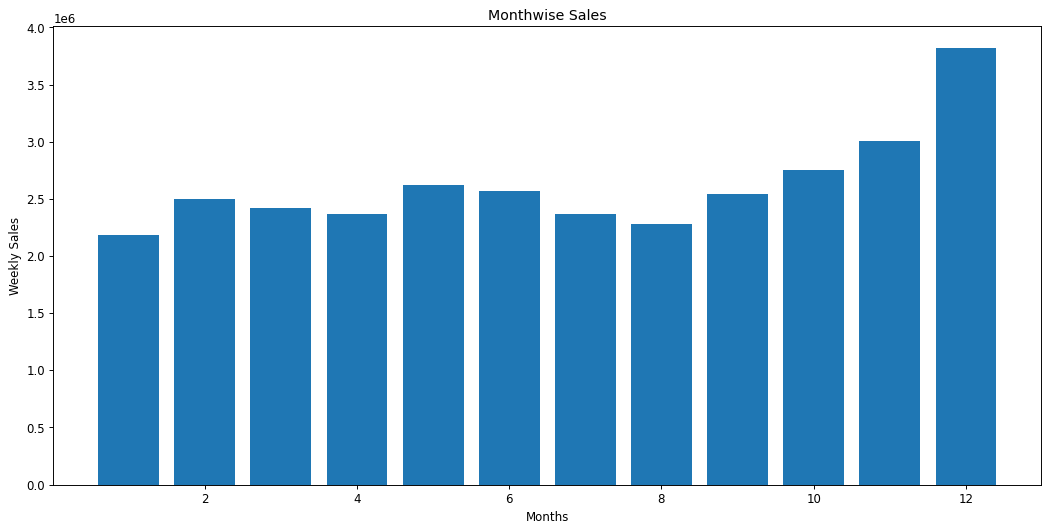

In [98]:
plt.figure(figsize = (15,7),dpi=85)
plt.bar(sales_data['month'],sales_data['Weekly_Sales'])
plt.xlabel('Months') 
plt.ylabel('Weekly Sales')
plt.title('Monthwise Sales')

In [99]:
#Semesterwise Sales
sales_data['semester'] = np.where(sales_data['month']< 7, 1, 2)

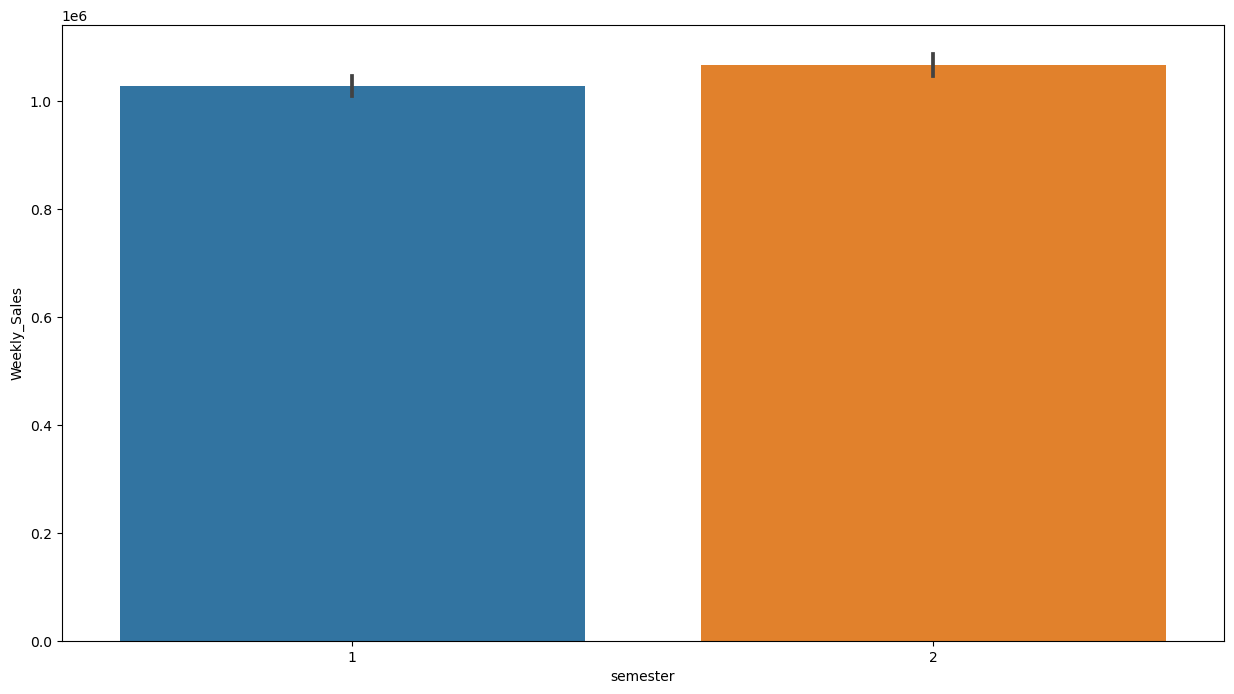

In [100]:
plt.figure(figsize =(15,8))
semester=sns.barplot(x='semester',y='Weekly_Sales',data=sales_data)

Insights drawn-(1)December month has the highest weekly sales. (2) Semester 2 has the highest weekly sales.

Model Building- First, define dependent and independent variables. Here, store, fuel price, CPI, unemployment, day, month, and year are the independent variables and weekly sales is the dependent variable. Now, it’s time to train the model. Import train_test_spit from sklearn.model_selection and train 80% of the data and test on the rest 20% of the data.

In [101]:
#Define independent and dependent variable
# Select features and target 
x=sales_data[['Store','Fuel_Price','CPI','Unemployment','day','month','year']]
y=sales_data['Weekly_Sales']

In [102]:
from sklearn.model_selection import train_test_split
# Split data to train and test (0.80:0.20)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [103]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Linear Regression:

Accuracy: 14.315832680223718
Mean Absolute Error: 431328.2157801653
Mean Squared Error: 274624592180.04773
Root Mean Squared Error: 524046.36453280324


D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


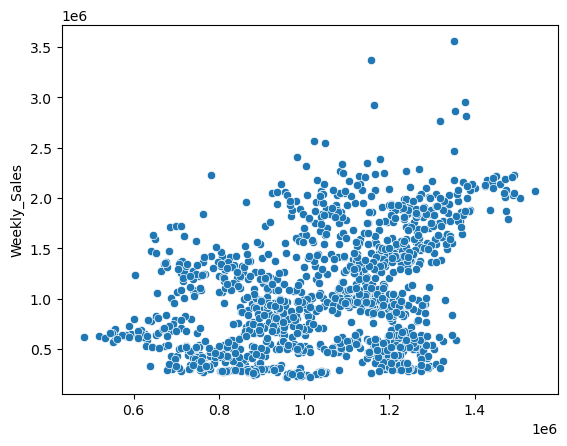

In [105]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Accuracy:',reg.score(x_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 13.762132635007696
Mean Absolute Error: 316645.6753086122
Mean Squared Error: 278705772667.64294
Root Mean Squared Error: 527925.9158893821


D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


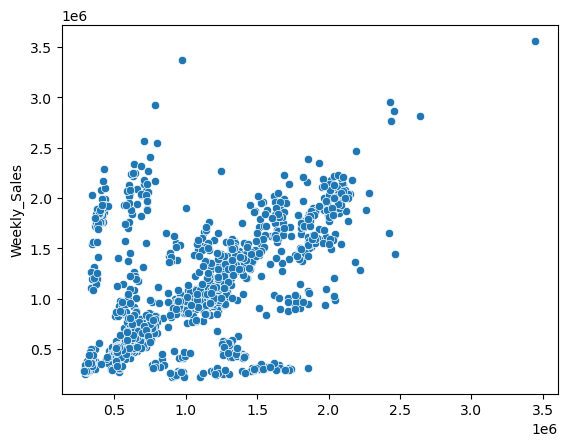

In [106]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('Accuracy:',rfr.score(x_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

Here, we have used 2 different algorithms to know which model to use to predict the weekly sales. Linear Regression is not an appropriate model to use as accuracy is very low. However, Random Forest Regression gives an accuracy of almost 89%. so, it is the best model to forecast weekly sales.

In [107]:
#Change dates into days by creating new variable.

sales_data['day'] = pd.to_datetime(sales_data['Date']).dt.day_name()
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1


In [108]:
experiment_day_start=5
sales_data['Date'] = pd.to_datetime(sales_data['Date'], dayfirst=True)
sales_data['exp_day'] = (sales_data['Date']-sales_data['Date'].min()).dt.days + experiment_day_start

In [109]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,semester,exp_day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday,1,117
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday,2,331
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday,1,45
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday,1,52
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday,1,118


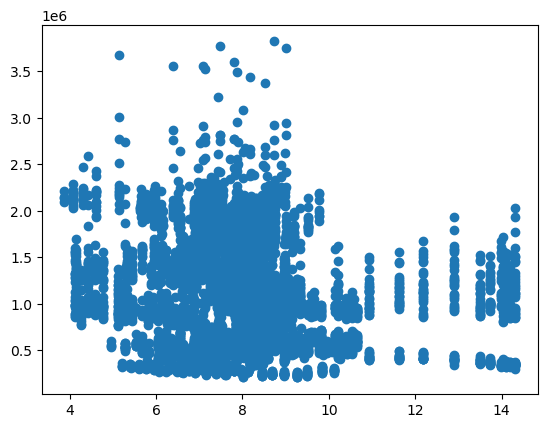

-0.10617608965795418


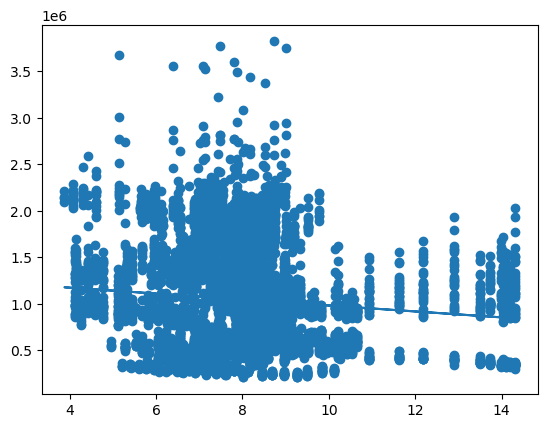

In [110]:
from sklearn.linear_model import LinearRegression
from scipy import stats
#Weekly sales vs Unemployment
x = sales_data['Unemployment']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

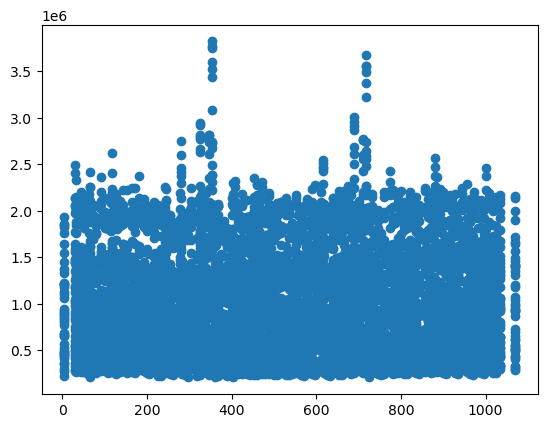

0.004591803306455495


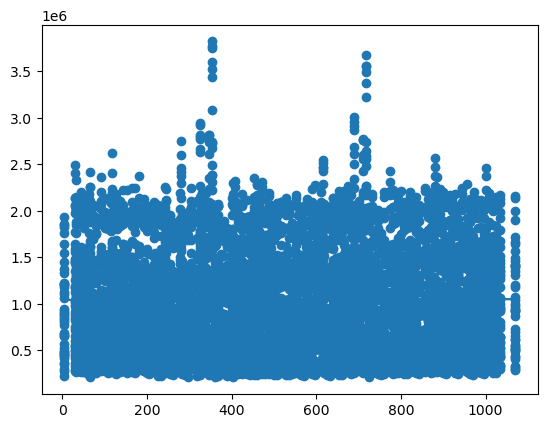

In [111]:
# Weekly_Sales vs exp_day
x = sales_data['exp_day']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

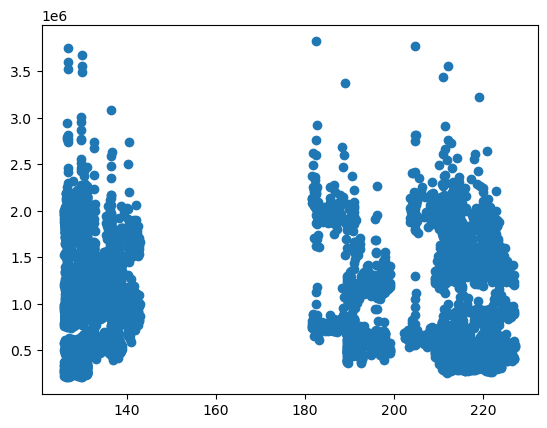

-0.07263416204017632


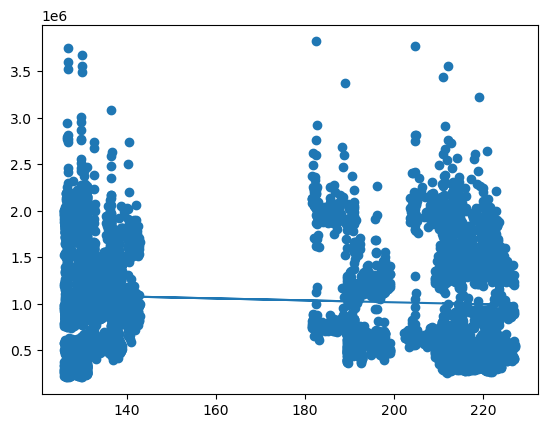

In [112]:
#Weekly sales vs CPI
x = sales_data['CPI']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

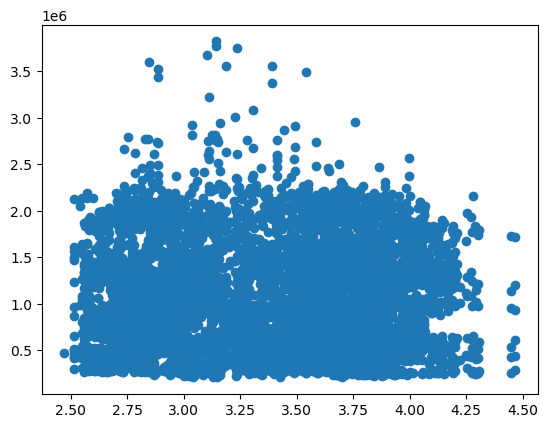

0.009463786314475123


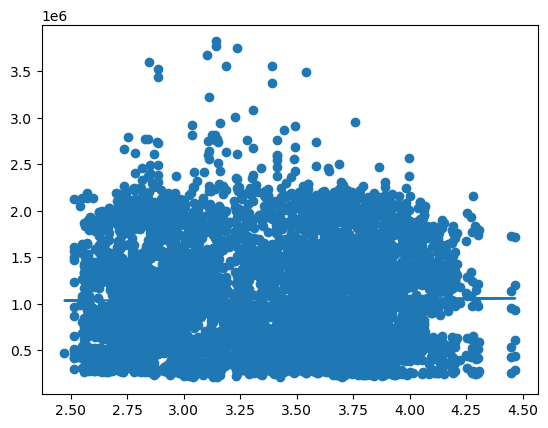

In [113]:
#Weekly sales vs Fuel price
x = sales_data['Fuel_Price']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

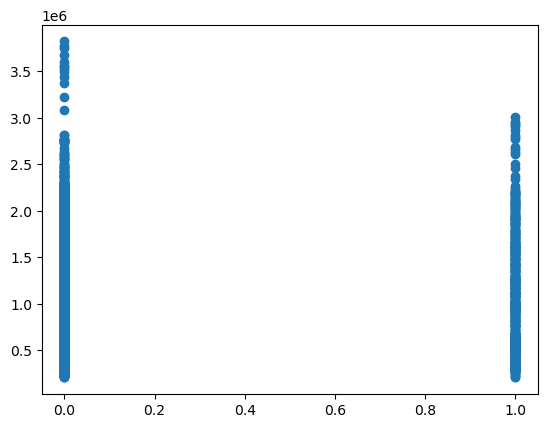

0.03689096801041456


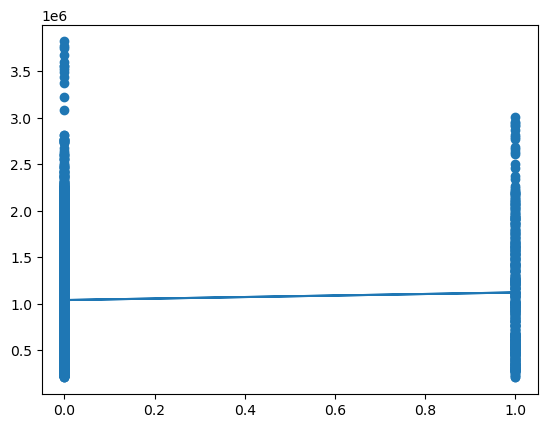

In [114]:
#Weekly sales vs Holidays
x = sales_data['Holiday_Flag']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

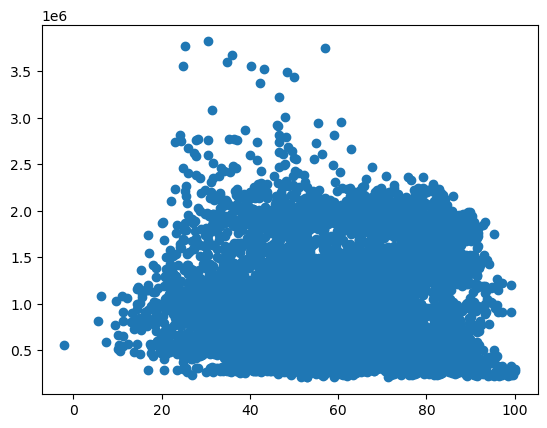

-0.06381001317946962


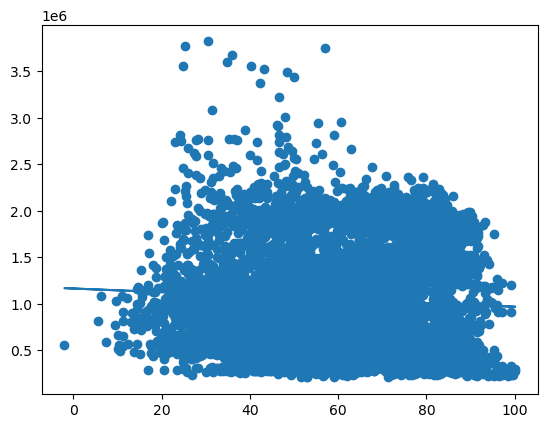

In [115]:
#Weekly sales vs Temperature
x = sales_data['Temperature']
y = sales_data['Weekly_Sales']
plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()